## Predicting Pulsars: Mean, Standard Deviation and Kurtosis Analysis

**Logan Chan, Sam Donato, Navneet Bedi, Ahadjon Sultonov**

### Introduction

Pulsars were first discovered in 1967 by astronomers Jocelyn Bell Burnell and Antony Hewish (American Physical Society, 2006). 

A pulsar is a rotating neutron star that is highly magnetized, causing them to emit beams of radiation. These stars provided the first indirect evidence for the existence of gravitational waves. Pulsar stars also have the potential to reveal extreme phenomena in neutron star astrophysics (Zhang et al., 2020. 

Thus, in effect, pulsars can be thought of as 'cosmic lighthouses.'

These beams can appear to pulse as the star rotates, but other astronomical phenomena in space can mimic these pulsar signals, which we call spurious signals. The spurious signals can be challenging to identify and seperate from pulsar signals (Gaskill, 2020). 

The goal of this project will be to use variables from the HTRU2 UC Irvine Machine Learning Repository Pulsar Star Dataset to classify whether a star is pulsar or not.

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). The data set shared contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples (Lyon, 2017).  In the data set, legitimate pulsar examples are a minority positive class, and spurious examples are the majority negative class. The class labels used are 0 (negative) and 1 (positive). Due to the number of predictor variables, we only chose a few potentially important predictors to focus on for the preliminary analysis.

The question we will be addressing is: **Given the mean, standard deviation, and excess kurtosis of the integrated profile, can we predict if a star is pulsar or if it is a spurious signal?**
To answer this question, we will be using the knn classifier algorithm.


### Preliminary Data Analysis and Methods

We are using the HTRU_2.csv data from the UC Irvine Machine Learning Repository Pulsar Star Dataset to predict if a star is a pulsar or a spurious signal. The columns are as follows:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR
9. ve.


The following columns are those being used in this project:

1. **mean_ip**: Mean of the integrated profile,
2. **std_dev_ip**: Standard deviation of the integrated profile,
4. **kurtosis_ip**: Excess kurtosis of the integrated profile,
5. **type**: Class of a star ( 0 = **spurious signal**, 1 = **pulsar**). Class


### Preprocessing and conducting exploratory data analysis on the data

The first step involved importing libraries and acquiring the dataset from the internet into a file, pulsar_data.csv.

Afterwards, the dataset was cleaned and organized to enhaetits e usability. This included assigning appropriate column types and introducing a new comnlu  ## what is our new column? ".

The data was then divided into training and testing sets, with focus primarily on the training set until the final stages.

Summarization of the training set was performed to inform predictions regarding the desired behavior of our classifier.

Furthermore, visualizations were created to explore the relationship "mean_ip", "std_dev_ip"d "kurtosis_ip", an,pchol", providing insights into the distribution of .ributed.

### Results

##### First, the required libraries are loaded using the library function.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

##### Next, using the read_csv function, we can read in the data from the web. 

In [2]:
## Download dataset from the internet
url <- "https://raw.githubusercontent.com/loganchan26/DSCI-100-project-group10-18/03a96760928865bfb961dc8ea308d3b129a82baf/HTRU_2.csv"
download.file(url, "data/pulsar_data.csv")

## Read the file in to visualize the data we are working with
pulsar_data <- read_csv("data/pulsar_data.csv", col_names = FALSE)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Cleaning and tidying the data

In [3]:
names(pulsar_data) <- c("mean_ip", "std_dev_ip", "kurtosis_ip", "skew_ip", "mean_curve", "std_dev_curve", "kurtosis_curve", "skew_curve", "type")

pulsar_data_selected <- pulsar_data |> 
select("mean_ip", "std_dev_ip", "kurtosis_ip", "type") |>
mutate(type = as_factor(type)) 
glimpse(pulsar_data_selected)

Rows: 17,898
Columns: 4
$ mean_ip     <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.72656, 93.5…
$ std_dev_ip  <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 46.69811…
$ kurtosis_ip <dbl> -0.23457141, 0.46531815, 0.32332837, -0.06841464, 0.600866…
$ type        <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…


#### Exploratory data analysis summary

In [4]:
## mean of each variable
mean_vars <- pulsar_data_selected |>
            mutate(avg_mean_ip = mean(mean_ip)) |>
            mutate(avg_std_dev_ip = mean(std_dev_ip)) |>
            mutate(avg_kurtosis_ip = mean(kurtosis_ip)) |>
            select("avg_mean_ip", "avg_std_dev_ip", "avg_kurtosis_ip") |>
            slice(1)
mean_vars

# number of each observation
num_observations <- pulsar_data_selected |>
                    group_by(type) |>
                    summarize(count = n())
num_observations

avg_mean_ip,avg_std_dev_ip,avg_kurtosis_ip
<dbl>,<dbl>,<dbl>
111.08,46.54953,0.4778573


type,count
<fct>,<int>
0,16259
1,1639


#### Exploratory Visualizations

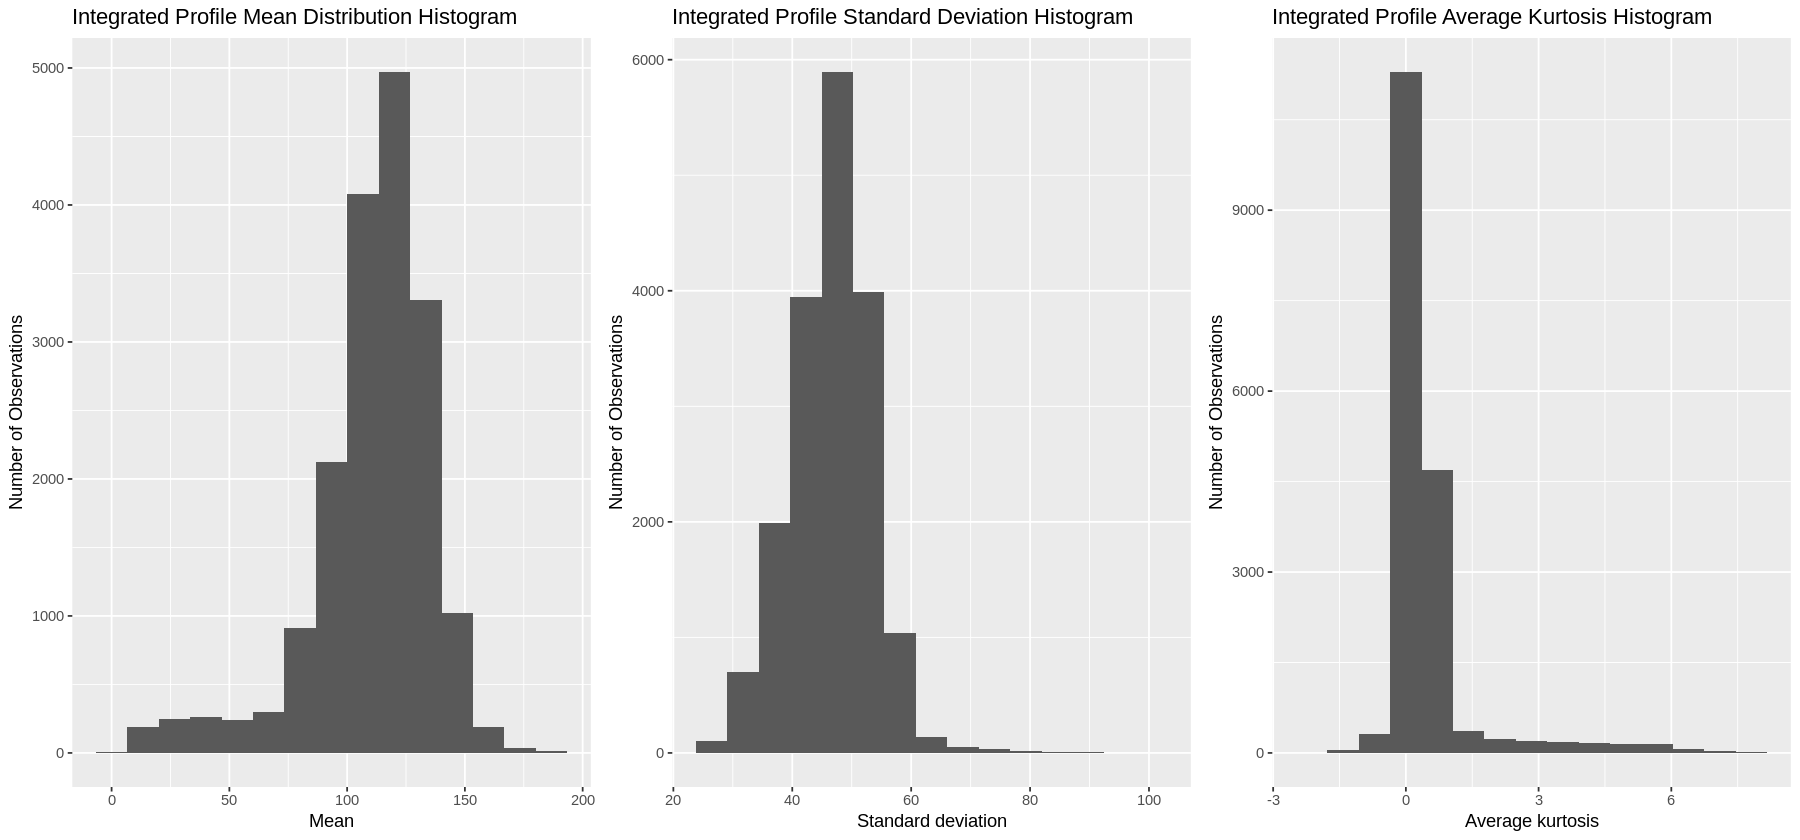

In [5]:
options(repr.plot.width = 15, repr.plot.height = 7)
## distribution of mean integrated profiles
mean_ip_histogram <- pulsar_data_selected |>
    ggplot(aes(x = mean_ip)) +
        geom_histogram(bins = 15) +
        labs(x = "Mean", y = "Number of Observations") +
        ggtitle("Integrated Profile Mean Distribution Histogram") +
        theme(text = element_text(size = 11))

## distribution of standard deviations
std_dev_histogram <- pulsar_data_selected |>
    ggplot(aes(x = std_dev_ip)) +
        geom_histogram(bins = 15) +
        labs(x = "Standard deviation", y = "Number of Observations") +
        ggtitle("Integrated Profile Standard Deviation Histogram") +
        theme(text = element_text(size = 11))

## distribution of average kurtosis
avg_kurtosis_histogram <- pulsar_data_selected |>
    ggplot(aes(x = kurtosis_ip)) +
        geom_histogram(bins = 15) +
        labs(x = "Average kurtosis", y = "Number of Observations") +
        ggtitle("Integrated Profile Average Kurtosis Histogram") +
        theme(text = element_text(size = 11))
plot_grid(mean_ip_histogram, std_dev_histogram, avg_kurtosis_histogram, ncol = 3)

#### Visualization of the relationships between the Predictors and the Class variables

In [6]:
##GGPLOT THE DATA WE HAVE 

EXPLANATION

#### Training and splitting the data 

In [7]:
set.seed(18)
pulsar_split <- initial_split(pulsar_data_selected, prop = 0.75, strata = type)
pulsar_training <- training(pulsar_split)
pulsar_testing  <- testing(pulsar_split)

explanation of what we see

#### Finding the Best K Value 

In [8]:
## Cross validation to tune k
set.seed(18)

pulsar_vfold <- vfold_cv(pulsar_training, v = 5, strata = type)

## create recipe
pulsar_recipe <- recipe(type~ mean_ip, std_dev_ip, kurtosis_ip, data = pulsar_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

## set specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results <- workflow() |>
                add_recipe(pulsar_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = pulsar_vfold, grid = k_vals) |>
                collect_metrics()
# glimpse(knn_results)

accuracies <- knn_results |>
            filter(.metric == "accuracy") |>
            arrange(desc(mean))
slice(accuracies, 1)
## use k = 12 for best results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
12,accuracy,binary,0.9648369,5,0.002080654,Preprocessor1_Model12


#### Visualization of Accuracy obtained with best K values

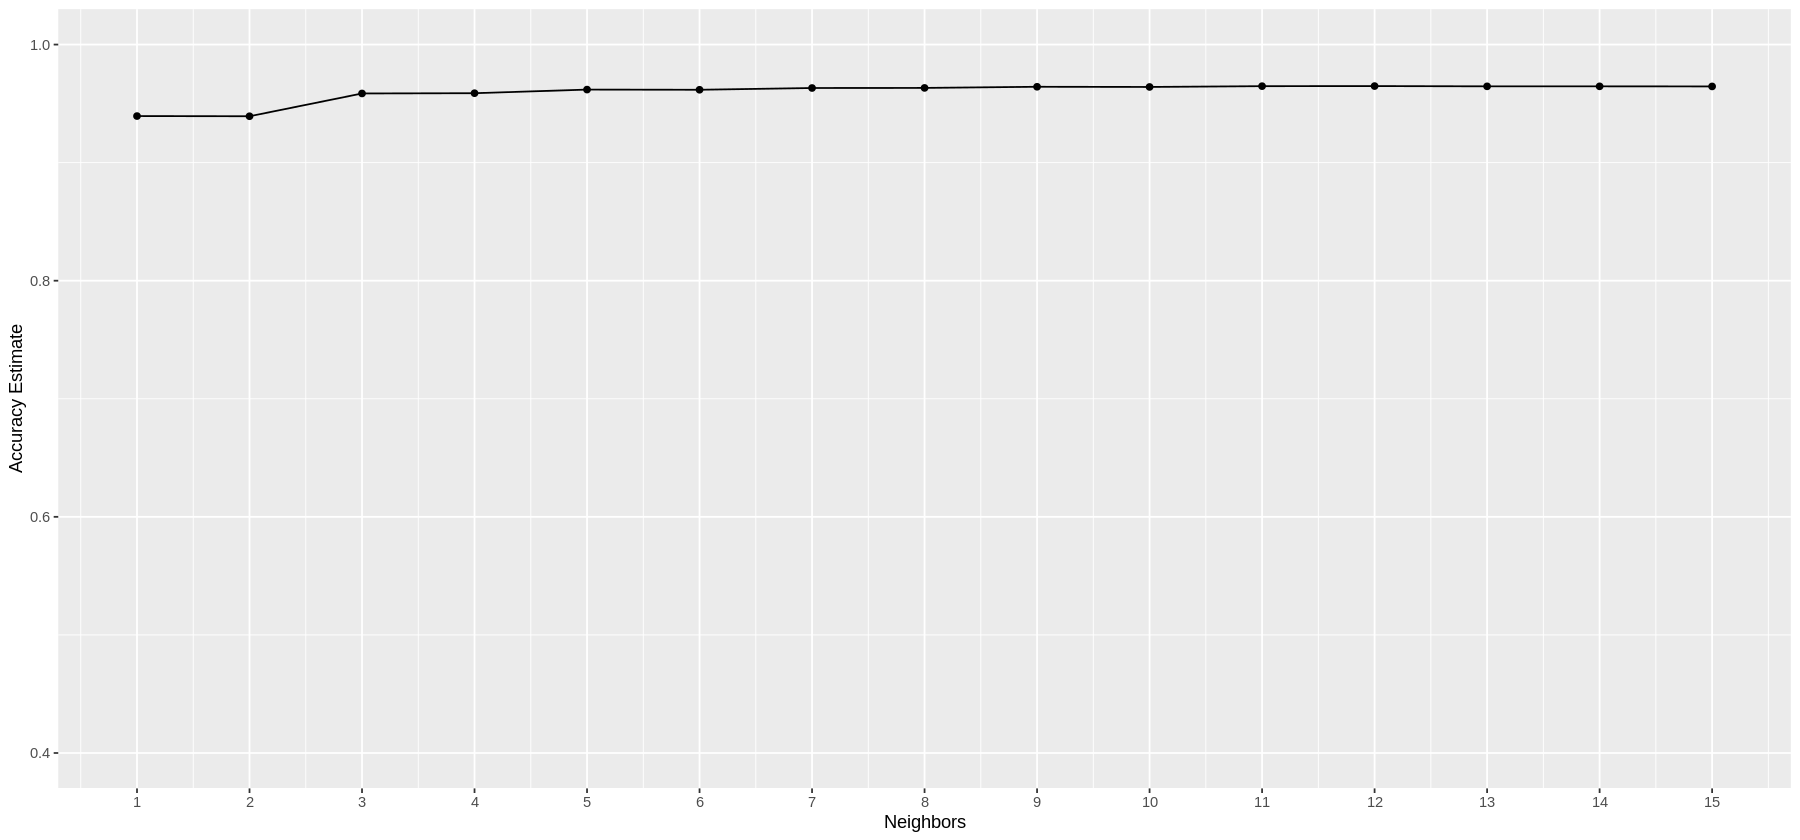

In [12]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(1, 15, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_vs_k

#### Creating our Model
STEPS>>>

In [9]:
# can reuse pulsar_recipe from above cell
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
  set_engine("kknn") |>
  set_mode("classification")

pulsar_fit <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(pulsar_spec) |>
  fit(data = pulsar_training)

some explanations

#### Use model to predict testing set

In [10]:
set.seed(18) 

pulsar_predictions <- predict(pulsar_fit, pulsar_testing) |>
                    bind_cols(pulsar_testing)

pulsar_metrics <- pulsar_predictions |>
                metrics(truth = type, estimate = .pred_class)
pulsar_metrics

#do we need this confusion matrix?
pulsar_conf_mat <- pulsar_predictions |>
                    conf_mat(truth = type, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9662570
kap,binary,0.7696213


#### model visualization

In [13]:
## how do I visualize something with 3 parameters without making it 3d?

### Discussion

#### Answering the Predictive Question

...

#### Expectations vs. Outcomes

...

#### Limitations

...

#### Potential Impacts

...

#### Future Questions

...

### References

Cheng Jun Zhang, Zhen Hong Shang, Wan Min Chen, Liu Xie, Xiang Hua Miao, A Review of Research on Pulsar Candidate Recognition Based on Machine Learning, Procedia Computer Science, Volume 166, 2020, Pages 534-538, ISSN 1877-0509, https://doi.org/10.1016/j.procs.2020.02.050.

Chodos, Alan. (February 2006). American Physical Society. APS News, Volume 15, Number 2). https://www.aps.org/publications/apsnews/200602/history.cfm

Gaskill, Melissa. (June 22, 2020). Phys.org https://phys.org/news/2020-06-future-space-cosmic-lighthouses.html

Lyon, Robert. (2017). HTRU2. UCI Machine Learning Repository. https://doi.org/10.24432/C5DK6R